In [1]:
# Import libraries
import torch
from torch import nn

import matplotlib.pyplot as plt

from pathlib import Path

## Functions

In [2]:
# Plot function
def plot_predictions(train_data,
                     train_label,
                     test_data,
                     test_label,
                     predictions=None):
    # Create a plit figure:
    plt.plot(figsize=(10, 7))
    
    # Plot training data (blue)
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
    
    # Plot test data (red)
    plt.scatter(test_data, test_label, c="r", s=4, label="Test data")
    
    # Plot predictions (green), if there are any
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    
    # Enable graph legend
    plt.legend(prop={"size":12})

## 00. Device agnostic Code

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"The used device is {device}")

The used device is cuda


## 01. Create a straight line dataset using the linear regression formula *(weight * X + bias)*.

* Set **weight=0.3** and **bias=0.9** there should be at least 100 datapoints total.
* Split the data into **80% training**, **20% testing**.
* Plot the training and testing data so it becomes visual.

In [4]:
# Setting weight & bias
weight = 0.3
bias = 0.9

In [5]:
# Set data range
start = 0
end = 1
step = 0.01

In [6]:
# Creating X (features) and labels (y)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X samples: \n{X[:10]}")
print(f"First 10 y samples: \n{y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X samples: 
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
First 10 y samples: 
tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [7]:
# Splitting the data
train_split = int(0.8 * len(X))

# Training data
X_train, y_train = X[:train_split], y[:train_split]

#Testing data
X_test, y_test = X[train_split:], y[train_split:]

# Print the length of each train/test set
len(X_train), len(y_train), len(X_test), len(y_test)   

(80, 80, 20, 20)

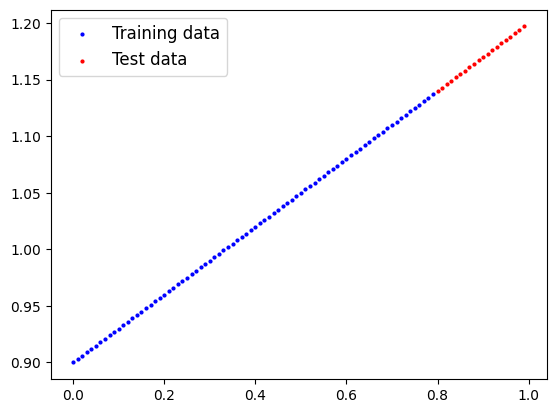

In [8]:
# PLot training and testing data sets
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,)

## 02. Build a PyTorch model by subclassing nn.Module.

* Inside should be a randomly initialized `nn.Parameter()` with **requires_grad=True**, one for ***weights*** and one for ***bias***.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().

***Note:*** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [9]:
# Creating a linear model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Weight parameter
        self.weight = nn.Parameter(data=torch.randn(1, 
                                               requires_grad=True,
                                               dtype=torch.float))            
        
        # Bias parameter
        self.bias = nn.Parameter(data=torch.randn(1, 
                                             requires_grad=True,
                                             dtype=torch.float))    
    
    # Forward function
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + bias

In [10]:
# Set manual seed
seed = torch.manual_seed(42)

# Create an instance of the linear regression model and put it to the target device
model = LinearRegressionModel().to(device)

model.state_dict()

OrderedDict([('weight', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

## 03. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

* Set the learning rate of the optimizer to be 0.01, and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for **300 epochs**.
* The training loop should test the model on the test dataset every *20 epochs*.

In [11]:
# Loss functions
loss_fn = nn.L1Loss()

In [12]:
# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [13]:
# # Training loop

# Set seed
torch.manual_seed(42)

# Set number of epochs
epochs = 300

# Place data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(1, epochs + 1):
    # # Training
    # Put the model to Train Mode
    model.train()
    
    # 01. Forward pass
    y_pred = model(X_train)
    
    # 02. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 03. Optimizer zero grad
    optimizer.zero_grad()
    
    # 04. Backpropagation
    loss.backward()
    
    # 05. Optimizer step
    optimizer.step()
    
    # Test model every 20 epochs
    if epoch % 20 == 0:
        # Put model to evaluation mode
        model.eval()
        
        # Setup inference context
        with torch.inference_mode():
            # 01. Forward pass
            y_predictions = model(X_test)
            # 02. Calculate test loss
            test_loss = loss_fn(y_predictions, y_test)
            
        # Print current information
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 20 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 40 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 60 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 80 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 100 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 120 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 140 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 160 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 180 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 200 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 220 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 240 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 260 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 280 | Train Loss: 0.0005 | Test Loss: 0.0025
Epoch: 300 | Train Loss: 0.0005 | Test Loss: 0.0025


## 04. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (**Note**: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [14]:
# Make predictions with the model
model.eval()

with torch.inference_mode():
    y_predictions = model(X_test)

print(y_predictions)
print(y_predictions.cpu())

tensor([[1.1378],
        [1.1407],
        [1.1437],
        [1.1467],
        [1.1496],
        [1.1526],
        [1.1556],
        [1.1586],
        [1.1615],
        [1.1645],
        [1.1675],
        [1.1704],
        [1.1734],
        [1.1764],
        [1.1794],
        [1.1823],
        [1.1853],
        [1.1883],
        [1.1912],
        [1.1942]], device='cuda:0')
tensor([[1.1378],
        [1.1407],
        [1.1437],
        [1.1467],
        [1.1496],
        [1.1526],
        [1.1556],
        [1.1586],
        [1.1615],
        [1.1645],
        [1.1675],
        [1.1704],
        [1.1734],
        [1.1764],
        [1.1794],
        [1.1823],
        [1.1853],
        [1.1883],
        [1.1912],
        [1.1942]])


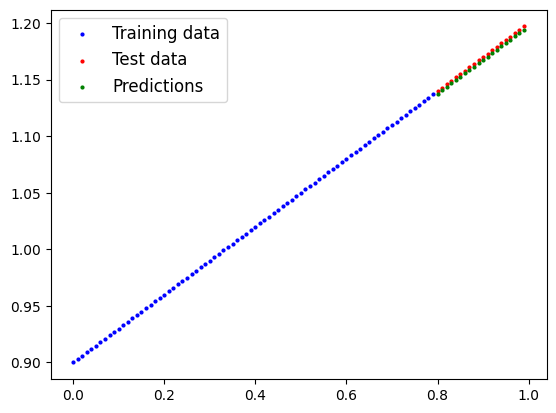

In [15]:
# Plot predictions
plot_predictions(train_data=X_train.cpu(),
                 train_label=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_label=y_test.cpu(),
                 predictions=y_predictions.cpu())

## 05. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [16]:
# # Saving the model's state_dict()

# 01. Create the model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 02. Create the model's save path
MODEL_NAME = "exercise_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 03. Save the model's state_dict()
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

# 04. Check if model is saved successfully
if MODEL_SAVE_PATH.exists():
    print(f"Model saved successfully at: {MODEL_SAVE_PATH}")
else:
    print("Failed to save the model.")

Model saved successfully at: models/exercise_model


In [17]:
# # Loading the saved model's state_dict()

# 01. Create new model instance
loaded_model = LinearRegressionModel()

# 02. Load the saved state_dict() into the new model instance
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH,
                                        weights_only=True))

# 03 Put the new model on the target device
loaded_model.to(device)

LinearRegressionModel()

In [18]:
# Make predictions with the loaded model & compare them to predictions with the saved model
y_predictions_new = loaded_model(X_test)

y_predictions == y_predictions_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [19]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.2972], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])